# CartPole 环境与自定义 Wrapper 示例

这个笔记本演示了如何创建自定义的 Gymnasium Wrapper 并应用于 CartPole 环境。

In [1]:
# 导入必要的库
import gymnasium as gym
import random

## 创建自定义 Wrapper

下面我们创建一个自定义的 `ActionWrapper`，它会以一定概率随机选择动作，而不是使用提供的动作。

In [2]:
class RandomActionWrapper(gym.ActionWrapper):
    def __init__(self, env: gym.Env, epsilon: float = 0.1):
        super(RandomActionWrapper, self).__init__(env)
        self.epsilon = epsilon

    def action(self, action: gym.core.WrapperActType) -> gym.core.WrapperActType:
        if random.random() < self.epsilon:
            action = self.env.action_space.sample()
            print(f"Random action {action}")
            return action
        return action

## 使用 Wrapper 运行环境

现在我们使用我们的自定义 Wrapper 来包装 CartPole 环境，并运行一个回合。

In [13]:
# 创建包装后的环境
env = RandomActionWrapper(env=gym.make("CartPole-v1"), epsilon=0.1)

# 重置环境
obs, _ = env.reset()
total_reward = 0.0

# 运行一个回合，总是选择动作 0
while True:
    obs, reward, done, _, _ = env.step(0)
    total_reward += reward
    if done:
        break

print(f"Reward got: {total_reward:.2f}")

Reward got: 9.00


## 实验：不同的 epsilon 值

我们可以尝试不同的 epsilon 值，看看它如何影响性能。

In [18]:
# 测试不同的 epsilon 值
epsilon_values = [0.0, 0.1, 0.3, 0.5, 0.7, 1.0]
results = []

for eps in epsilon_values:
    env = RandomActionWrapper(gym.make("CartPole-v1"), epsilon=eps)
    obs, _ = env.reset()
    total_reward = 0.0
    
    print(f"\nRunning with epsilon = {eps}")
    while True:
        obs, reward, done, _, _ = env.step(0)  # 总是选择动作 0
        total_reward += reward
        if done:
            break
    
    results.append((eps, total_reward))
    print(f"Epsilon: {eps}, Total reward: {total_reward:.2f}")

# 打印结果摘要
print("\nResults summary:")
for eps, reward in results:
    print(f"Epsilon: {eps}, Reward: {reward:.2f}")


Running with epsilon = 0.0
Epsilon: 0.0, Total reward: 9.00

Running with epsilon = 0.1
Epsilon: 0.1, Total reward: 9.00

Running with epsilon = 0.3
Random action 0
Random action 1
Epsilon: 0.3, Total reward: 11.00

Running with epsilon = 0.5
Random action 0
Random action 0
Random action 0
Epsilon: 0.5, Total reward: 10.00

Running with epsilon = 0.7
Random action 0
Random action 0
Random action 1
Random action 1
Random action 1
Random action 1
Random action 1
Random action 0
Random action 1
Random action 1
Random action 0
Random action 0
Random action 1
Random action 1
Epsilon: 0.7, Total reward: 17.00

Running with epsilon = 1.0
Random action 0
Random action 0
Random action 0
Random action 0
Random action 0
Random action 1
Random action 0
Random action 1
Random action 0
Random action 0
Random action 0
Epsilon: 1.0, Total reward: 11.00

Results summary:
Epsilon: 0.0, Reward: 9.00
Epsilon: 0.1, Reward: 9.00
Epsilon: 0.3, Reward: 11.00
Epsilon: 0.5, Reward: 10.00
Epsilon: 0.7, Reward: 

## 可视化结果

我们可以绘制不同 epsilon 值对应的奖励。

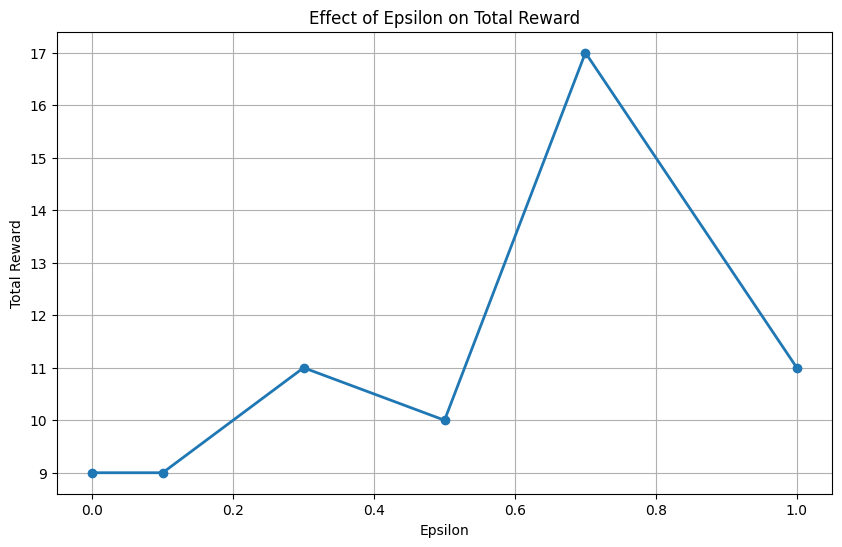

In [19]:
import matplotlib.pyplot as plt

# 提取数据
eps_values = [eps for eps, _ in results]
reward_values = [reward for _, reward in results]

# 绘制图表
plt.figure(figsize=(10, 6))
plt.plot(eps_values, reward_values, 'o-', linewidth=2)
plt.xlabel('Epsilon')
plt.ylabel('Total Reward')
plt.title('Effect of Epsilon on Total Reward')
plt.grid(True)
plt.show()